# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Sara Calle Muñoz
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

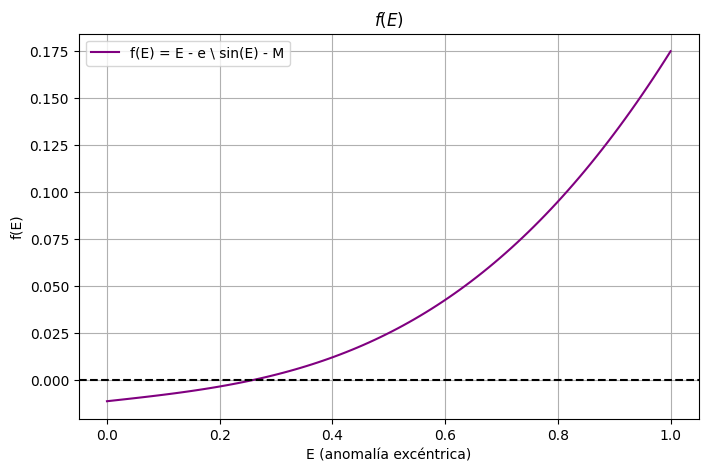

In [6]:
#definimos los párametros
e = 0.9672671
T = 75.96000
t0 = 1986.1113
t = 1986 + (31 + 28 + 31) / 365  # 1 de abril
M = 2 * np.pi / T * (t - t0)

#definamos la función f(E) = E - e*sin(E) - M
def f(E):
    return E - e * np.sin(E) - M

#definimos la derivada para luego evaluar con el método de newton
def df(E):
    return 1 - e * np.cos(E)

#para graficar
E_vals = np.linspace(0, 1, 100)
f_vals = f(E_vals)

plt.figure(figsize=(8, 5))
plt.plot(E_vals, f_vals, color='purple', label='f(E) = E - e \ sin(E) - M')
plt.axhline(0, color='black', linestyle='--')
plt.title('$f(E)$')
plt.xlabel('E (anomalía excéntrica)')
plt.ylabel('f(E)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#resorvemos la ecuación con el método de newton y secante
from scipy.optimize import newton

#solución por newton
E_newton = newton(func=f, x0=0.5, fprime=df)
print(f"Solución con el método de Newton-Raphson: {E_newton}")

#solución por secante
E_secante = newton(func=f, x0=0.5, x1=0.6)
print(f"Solución con el método de la Secante: {E_secante}")

Solución con el método de Newton-Raphson: 0.25777013516225367
Solución con el método de la Secante: 0.25777013516245345


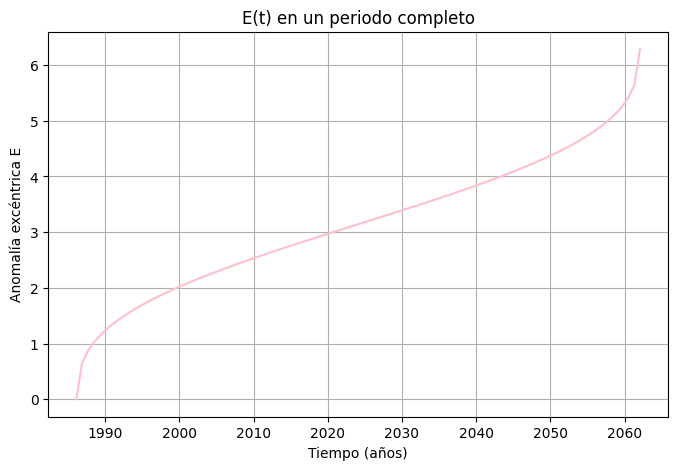

In [ ]:
#para gráficar E = E(t)
times = np.linspace(t0, t0 + T, 101)  #101 puntos incluyendo a t0
M_vals = 2 * np.pi / T * (times - t0)
E_vals = []

for M_i in M_vals:
    f_i = lambda E: E - e * np.sin(E) - M_i
    E_vals.append(newton(func=f_i, x0=0.5))

plt.figure(figsize=(8, 5))
plt.plot(times, E_vals, color = 'pink')
plt.title('E(t) en un periodo completo')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica E')
plt.grid(True)
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [ ]:
#definimos T y la función
T = 0.5

#para el método de la secante y punto fijo
from scipy.optimize import fixed_point

f = lambda m: m - np.tanh(m/T) #función para secante
g = lambda m: m-f(m) #funcion g para punto fijo

raiz_secante = newton(f, x0=0.1, x1=0.9)
raiz_pfijo = fixed_point(g, 1.0)
print(f"La raiz utilizando el metodo de la secante: {raiz_secante:.4f}")
print(f"La raiz con el metodo de punto fijo: {raiz_pfijo:.4f}")

La raiz utilizando el metodo de la secante será: 0.9575
La raiz con el metodo de punto fijo será: 0.9575


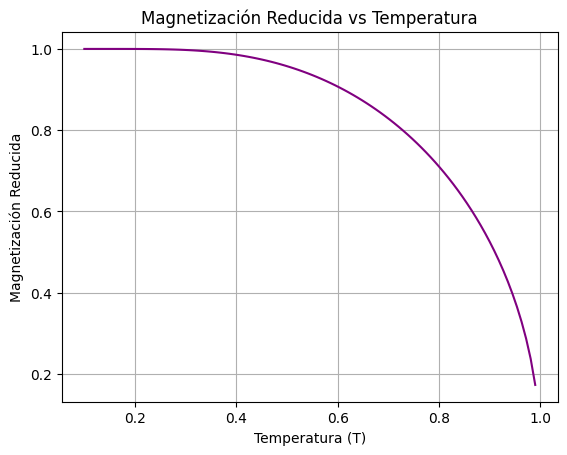

In [ ]:
#para gráficar
T = np.linspace(0.1,0.99,100)
magnetizacion_reducida = []

def f(m,T):
  return m-np.tanh(m/T)
for temp in T:
  raiz_secante = newton(f, 1, args=(temp,))
  magnetizacion_reducida.append(raiz_secante)
magnetizacion_reducida = np.array(magnetizacion_reducida)

plt.plot(T, magnetizacion_reducida, color='purple')
plt.title('Magnetización Reducida vs Temperatura')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización Reducida')
plt.grid(True)
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [ ]:
R = 8.314 #en J/K
T0 = 4.444 #en K
G = -1e5

#definimos la función f(T) para igualar a cero
def f(T):
    return -R * T * np.log((T / T0) ** (5 / 2)) + 1e5

#elegimos una estimación inicial para la temperatura
T_inicial = 300

#aplicamos el método de Newton
T_solucion = newton(f, T_inicial)
print(f"La temperatura T para G = -10^5 J es aproximadamente: {T_solucion:.2f} K")

La temperatura T para G = -10^5 J es aproximadamente: 904.97 K


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

In [2]:
#definimos I0, I(x) y I'(x)
I0 = 1
def I(x):
    return I0 * (np.sin(x) / x) ** 2

def I_prima(x):
  return (2 * I0 / x )* (np.cos(x) - (np.sin(x) / x))*(np.sin(x) / x)

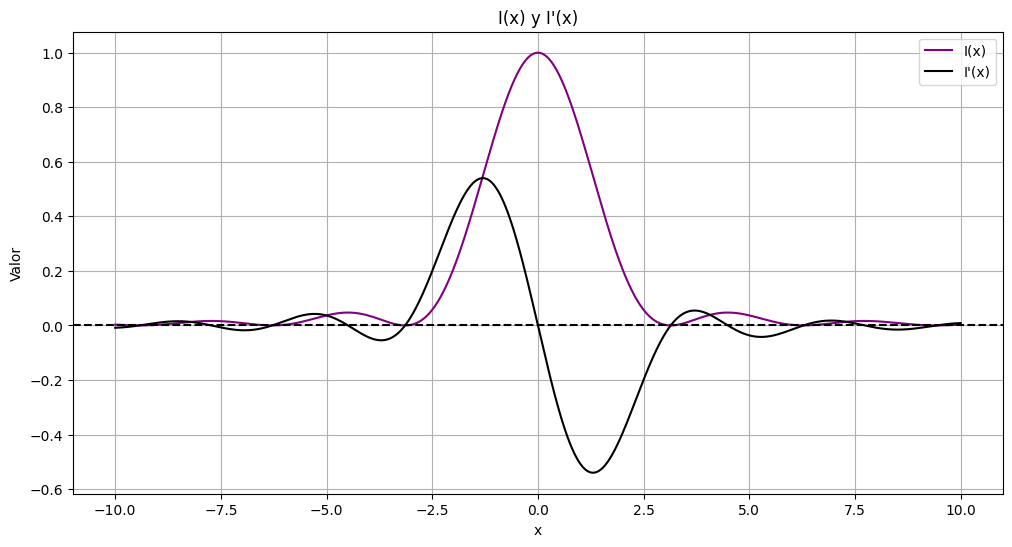

In [3]:
#graficamos
x_vals = np.linspace(-10, 10, 1000)
I_vals = I(x_vals)
I_prima_vals = I_prima(x_vals)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, I_vals, label='I(x)', color='purple')
plt.plot(x_vals, I_prima_vals, label="I'(x)", color='black')
plt.axhline(0, color='black', linestyle='--')
plt.title('I(x) y I\'(x)')
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#para resolver por el método de la secante
f = lambda x: I(x) - 0.5
x0 = np.pi
x1 = 4*np.pi

raiz_secante = newton(f, x0=x0, x1=x1, tol = 1e-8, maxiter=1000)
print(f"La raíz utilizando el método de la secante: {raiz_secante:.6f}")
#no converge en el intervalo con el método de la secante :(

RuntimeError: Tolerance of 9.42477796076938 reached. Failed to converge after 1 iterations, value is 12.566370614359172.

In [9]:
#para los máximos locales, el codigo para el método de regula falsi fue desarrollado para la actividad #4
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
  c_anterior = []
  if f(a) * f(b) >= 0:
   raise ValueError("El intervalo no es válido")
  else:
    for i in range(max_iter):
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        c_anterior.append(c)
        if abs(f(c)) < tol:
            return c, c_anterior, i + 1

        elif f(c) * f(a) > 0:
            a = c
        else:
            b = c
    raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')


In [19]:
#creamos los puntos en [-10, 10] con paso h = 0.5
x_vals = np.linspace(-10, 10, int((10 - (-10)) / 0.5) + 1)

#localizamos los intervalos con cambio de signo en I'(x)
intervalos = []
for i in range(len(x_vals) - 1):
    a, b = x_vals[i], x_vals[i + 1]
    if I_prima(a) * I_prima(b) < 0:
        intervalos.append((a, b))

#aplicamos regula falsi en cada intervalo
raices = []
for a, b in intervalos:
    try:
        raiz, _, _ = regula_falsi(I_prima, a, b, tol=1e-8, max_iter=200)
        raices.append(raiz)
    except:
        pass  #ignorar intervalos que no convergen

#filtrar solo los máximos
maximos = []
epsilon = 1e-3
for xi in raices:
    if I_prima(xi - epsilon) > 0 and I_prima(xi + epsilon) < 0:
        maximos.append(xi)

print("Máximos locales de I(x) en [-10, 10]:")
for xi in maximos:
    print(f"  x = {xi:.6f}, I(x) = {I(xi):.6f}")

Máximos locales de I(x) en [-10, 10]:
  x = -7.725252, I(x) = 0.016480
  x = -4.493409, I(x) = 0.047190
  x = 4.493409, I(x) = 0.047190
  x = 7.725252, I(x) = 0.016480


<ipython-input-2-4ff062e99d35>:7: RuntimeWarning: divide by zero encountered in scalar divide
  return (2 * I0 / x )* (np.cos(x) - (np.sin(x) / x))*(np.sin(x) / x)
<ipython-input-2-4ff062e99d35>:7: RuntimeWarning: invalid value encountered in scalar divide
  return (2 * I0 / x )* (np.cos(x) - (np.sin(x) / x))*(np.sin(x) / x)


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

In [ ]:
#definimos los párametros
h = 6.626e-34 #en J·s
kB = 1.381e-23 #en J/K
c = 2.998e8 #en m/s

#definimos la función
def planck(x, T):
  lambda_0 = h * c / (kB * T)
  K = 8 * np.pi * h * c / lambda_0**5
  return K / (x**5 * (np.exp(1/x) - 1))


#definimos la derivada
def dplanck(x):
  num = 5 * x + (1 - 5 * x) * np.exp(1/x)
  denom = x**7 * (np.exp(1/x) - 1)**2
  return num / denom

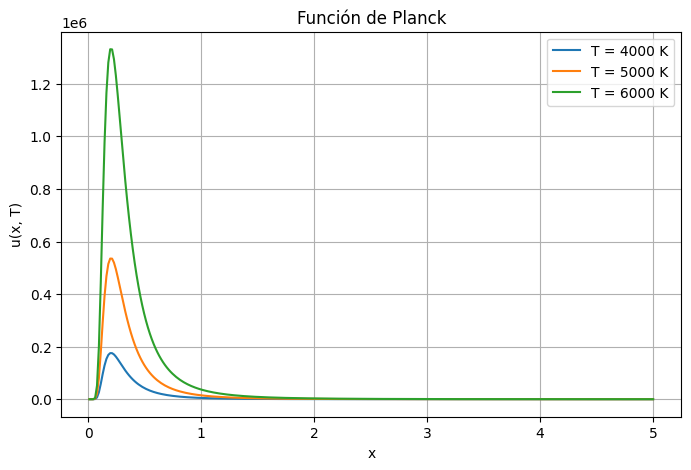

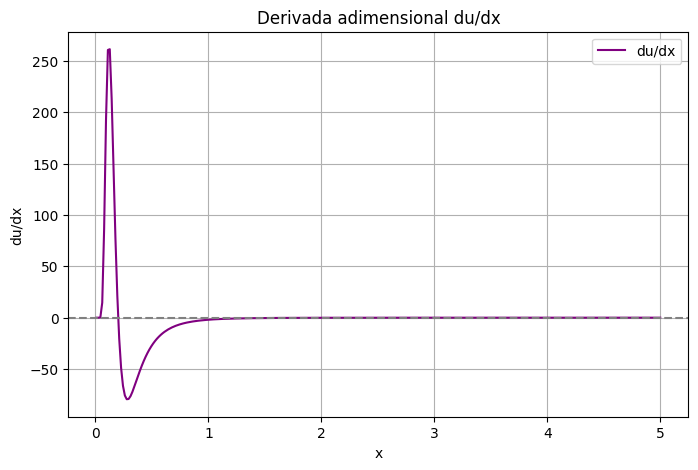

In [ ]:
#gráficamos
T_values = [4000, 5000, 6000]
x = np.linspace(0.01, 5, 300)

#gráfico de u(x, T)
plt.figure(figsize=(8, 5))
for T in T_values:
    plt.plot(x, planck(x, T), label=f"T = {T} K")
plt.title("Función de Planck")
plt.xlabel("x")
plt.ylabel("u(x, T)")
plt.grid(True)
plt.legend()
plt.show()

#gráfico de derivada du/dx
plt.figure(figsize=(8, 5))
plt.plot(x, dplanck(x), color = 'purple', label="du/dx")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Derivada adimensional du/dx")
plt.xlabel("x")
plt.ylabel("du/dx")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#para la ley de desplazamiento de Wien
#encontremos el máximo u(x) resolviendo du/dx = 0
from scipy.optimize import root_scalar
sol = root_scalar(dplanck, bracket=[0.01, 5], method='brentq')
x_max = sol.root

print(f"Valor de x donde u(x) es máximo: x_max = {x_max:.5f}")

#aplicamos la Ley de Wien
def lambda_max(T):
    lambda_0 = h * c / (kB * T)
    return x_max * lambda_0

T_sol = 5778  #temperatura del Sol
lambda_max_sol = lambda_max(T_sol)

print(f"Ley de Wien para T = {T_sol} K:")
print(f"λ_max =  {x_max:.5f}")
#print(f"   λ_max = {lambda_max_sol * 1e9:.2f} nm")

Valor de x donde u(x) es máximo: x_max = 0.20141
Ley de Wien para T = 5778 K:
λ_max =  0.20141


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

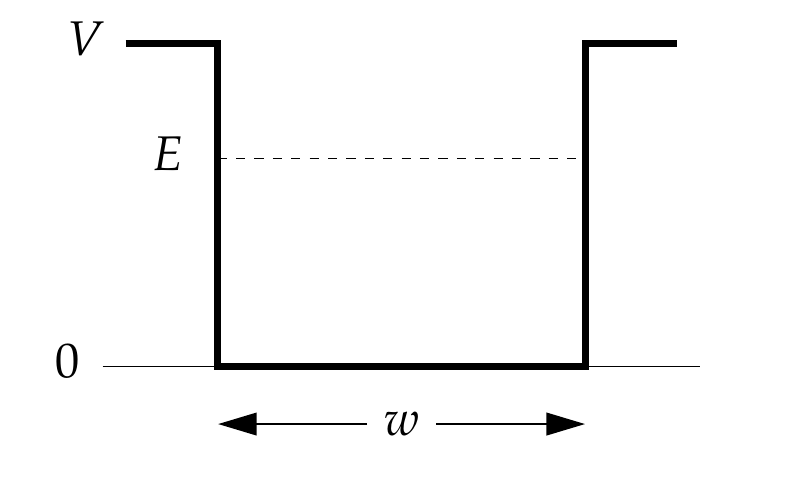

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

In [24]:
#definimos los párametros y las funciones
hbarra = 1.055e-34 #en J·s
m = 9.11e-31 #en kg
eV = 1.602e-19 #J
w = 1e-9 #1 nm = 1e-9 m
V0_eV = 20 #en eV
V0 = V0_eV * eV #convertimos V a Joules

#energía E en eV (convertida luego a Joules)
E_eV = np.linspace(0.001, V0_eV - 0.001, 1000)
E = E_eV * eV

def y1(E):
    return np.tan(np.sqrt(w**2 * m * E / (2 * hbarra**2)))

def y2(E):
    return np.sqrt((V0 - E) / E)

def y3(E):
    return -np.sqrt(E / (V0 - E))


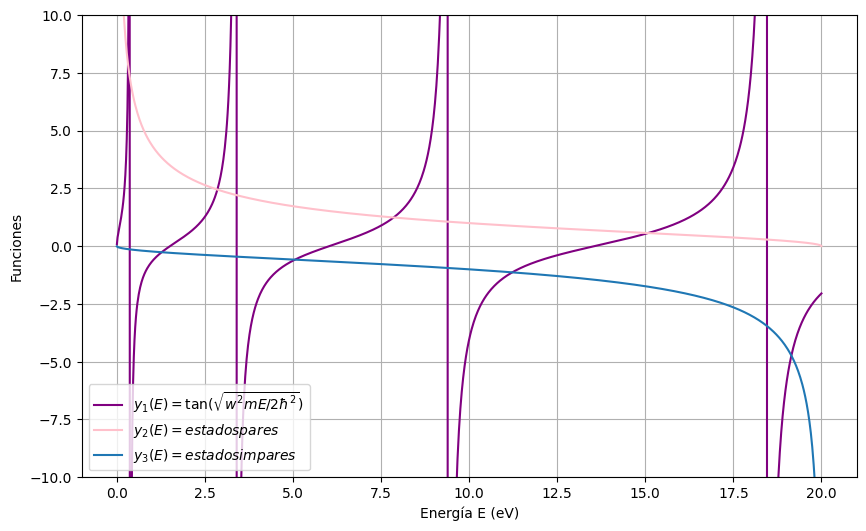

In [25]:
#graficamos
plt.figure(figsize=(10, 6))
plt.plot(E_eV, y1(E), color='purple', label=r'$y_1(E) = \tan(\sqrt{w^2 m E / 2 \hbar^2})$')
plt.plot(E_eV, y2(E), color='pink', label=r'$y_2(E) = estados pares$')
plt.plot(E_eV, y3(E), label=r'$y_3(E) = estados impares$')
plt.ylim(-10, 10)
plt.xlabel("Energía E (eV)")
plt.ylabel("Funciones")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#para los primeros seis niveles de energía
from scipy.optimize import bisect

#funcion para estados pares
def f_par(E_eV):
    E = E_eV * eV
    k = np.sqrt(w**2 * m * E / (2 * hbarra**2))
    return np.tan(k) - np.sqrt((V0 - E) / E)

#funcion para estados impares
def f_impar(E_eV):
    E = E_eV * eV
    k = np.sqrt(w**2 * m * E / (2 * hbarra**2))
    return np.tan(k) + np.sqrt(E / (V0 - E))


In [30]:
#lista para guardar los niveles
niveles_energia = []

#valores de energía
E_vals = np.linspace(0.01, 12, 1000)

#buscamos las raíces para estados pares
for i in range(len(E_vals) - 1):
    a, b = E_vals[i], E_vals[i + 1]
    try:
        if np.sign(f_par(a)) != np.sign(f_par(b)):
            raiz = bisect(f_par, a, b, xtol=0.001)
            niveles_energia.append((raiz, "par"))
    except Exception:
        pass

#buscamos las raíces para estados impares
for i in range(len(E_vals) - 1):
    a, b = E_vals[i], E_vals[i + 1]
    try:
        if np.sign(f_impar(a)) != np.sign(f_impar(b)):
            raiz = bisect(f_impar, a, b, xtol=0.001)
            niveles_energia.append((raiz, "impar"))
    except Exception:
        pass

#eliminamos los posibles duplicados
niveles_energia = list(set(niveles_energia))

#ordenamos los niveles
niveles_energia.sort()

print("Niveles de energía:")
for i, (E, tipo) in enumerate(niveles_energia):
    print(f"n = {i} ({tipo}): E = {E:.3f} eV")

Niveles de energía:
n = 0 (par): E = 0.318 eV
n = 1 (impar): E = 0.377 eV
n = 2 (par): E = 0.377 eV
n = 3 (impar): E = 1.271 eV
n = 4 (par): E = 2.854 eV
n = 5 (impar): E = 3.388 eV
n = 6 (par): E = 3.388 eV
n = 7 (impar): E = 5.055 eV
n = 8 (par): E = 7.856 eV
n = 9 (impar): E = 9.408 eV
n = 10 (par): E = 9.408 eV
n = 11 (impar): E = 11.224 eV


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [31]:
#definimos los párametros
G = 6.674e-11 #en (m^3 kg^-1 s^-2)
M = 5.974e24 #en kg
m = 7.348e22 #en kg
R = 3.844e8 #en m
w = 2.662e-6 #en rad/s

#definimos la función
def f(r):
  term1 = G * M / r**2
  term2 = G * m / (R - r)**2
  term3 = w**2 * r
  return term1 - term2 - term3

#Usamos r1 = R / 2 y un segundo punto más cercano al lado de la Tierra o la Luna
r1 = 3.844e8 / 2
r2 = 3.844e8 / 2 + 1e7

#usamos el método de la secante
raiz_secante = newton(f, x0=r1, x1=r2)
print(f"La distancia desde la Tierra hasta L1 es aproximadamente: {raiz_secante/1000:.2f} km")


La distancia desde la Tierra hasta L1 es aproximadamente: 326045.07 km
